<a href="https://colab.research.google.com/github/MahiSharma000/Machine_Learning/blob/main/Linear_Regression_and_multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

23MCA1058
MAHI SHARMA
18-01-2023

Machine Learning Lab(PMCA507P)

Exercise_2 Linear Regression & Multiple Linear Regression

LINEAR REGRESSION-----

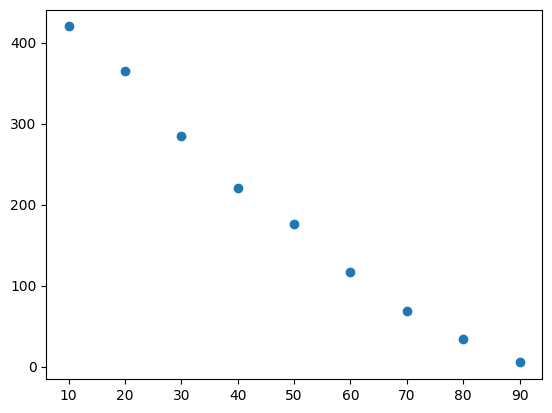

In [44]:
import matplotlib.pyplot as plt
x = [10,20,30,40,50,60,70,80,90]
y = [420,365,285,220,176,117,69,34,5]
plt.scatter(x, y)
plt.show()

In [45]:
from scipy import stats
B1, B0, r, p, std_err = stats.linregress(x, y)
print(B0,B1,r,std_err)

453.55555555555554 -5.3133333333333335 -0.9919863879175506 0.2557818184006401


In [46]:
def myfunc(x):
  return B0 + B1 * x

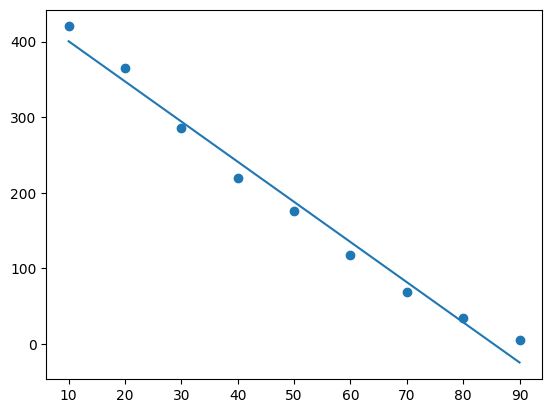

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     431.5
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           1.51e-07
Time:                        16:34:12   Log-Likelihood:                -38.516
No. Observations:                   9   AIC:                             81.03
Df Residuals:                       7   BIC:                             81.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        453.5556     14.394     31.511      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [47]:
import statsmodels.api as sm
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

In [48]:
import numpy as np
from scipy.stats import linregress, t

# Given data
t_values = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
y_values = np.array([420, 365, 285, 220, 176, 117, 69, 34, 5])

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(t_values, y_values)

# Degrees of freedom
df = len(t_values) - 2

# Two-tailed t-distribution critical value for 95% confidence level
t_critical = t.ppf(0.975, df)

# Standard error of the slope
se_slope = std_err / np.sqrt(np.sum((t_values - np.mean(t_values))**2))

# Margin of error
margin_of_error = t_critical * se_slope

# Confidence interval for the slope
confidence_interval = (slope - margin_of_error, slope + margin_of_error)

# Print the results
print(f"Slope: {slope}")
print(f"Standard Error of Slope: {se_slope}")
print(f"Degrees of Freedom: {df}")
print(f"Critical Value: {t_critical}")
print(f"Margin of Error: {margin_of_error}")
print(f"95% Confidence Interval for Slope: {confidence_interval}")


Slope: -5.3133333333333335
Standard Error of Slope: 0.0033021290764277634
Degrees of Freedom: 7
Critical Value: 2.3646242510102993
Margin of Error: 0.007808294494087331
95% Confidence Interval for Slope: (-5.321141627827421, -5.305525038839246)


The estimated slope indicates the average change in life time for every degree increase in temperature.

The 95% confidence interval provides a likely range for the true impact of temperature on life time.

If this range includes zero, there isn't enough evidence to confidently say that temperature significantly affects life time; observed changes might be due to random variation.


The negative slope (-5.313) suggests a negative relationship between temperature and life time. As temperature increases, life time is estimated to decrease by approximately 5.313 hours.

The magnitude of the slope is relatively large (absolute value of -5.313), indicating a substantial effect of temperature on life time.

The small standard error of the slope (0.0033) and the degrees of freedom (7) suggest a precise estimate. The critical value (2.365) is much larger than the margin of error (0.0078), indicating statistical significance

MULTIPLE REGRESSION----

In [49]:
import pandas as pd
from sklearn import linear_model
df = pd.read_excel("/content/HPPDS.xlsx")
print(df.columns)
x = df[['X1','X2']]
y = df['Y']
regr = linear_model.LinearRegression()

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'Y'], dtype='object')


In [50]:
print(df.dtypes)


Unnamed: 0    object
X1            object
X2            object
X3            object
Y             object
dtype: object


In [51]:
print(df['X1'].unique())
print(df['X2'].unique())
print(df['Y'].unique())

['Sqft' 2192 3429 2842 2987 3029 2616 2978 3595 2838 2591 3633 2822 2994
 2696 2134 3076 3259 3162 2885 2550 3380 3131 2754 2710 2608 3572 2924
 3614 2600]
['LotSize' 16.4 24.7 17.7 20.3 22.2 20.8 17.3 22.4 27.4 19.2 26.9 23.1
 20.4 22.7 13.4 19.8 19.4 23.2 20.2 19.6 22.5 21.6 29 21.8 25.5 24.1]
['Price' 505.5 784.1 649 689.8 709.8 590.2 643.3 789.7 683 544.3 822.8
 637.7 618.7 619.3 490.5 675.1 710.4 674.7 663.6 606.6 758.9 723.3 621.8
 622.4 631.3 574 863.8 652.7 844.2 629.9]


In [52]:
df['X1'] = pd.to_numeric(df['X1'], errors='coerce')
df['X2'] = pd.to_numeric(df['X2'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')

In [53]:
df = df.dropna()  # Drop rows with NaN values

In [54]:
x = df[['X1','X2']]
y = df['Y']
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

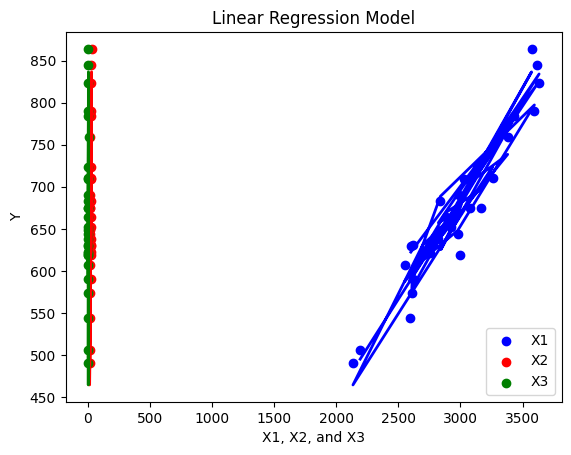

In [55]:
plt.scatter(df['X1'], df['Y'], color='blue', label='X1')
plt.scatter(df['X2'], df['Y'], color='red', label='X2')
plt.scatter(df['X3'], df['Y'], color='green', label='X3')

# Plot the regression lines
plt.plot(df['X1'], regr.predict(x), color='blue', linewidth=2)
plt.plot(df['X2'], regr.predict(x), color='red', linewidth=2)
plt.plot(df['X3'], regr.predict(x), color='green', linewidth=2)

plt.xlabel('X1, X2, and X3')
plt.ylabel('Y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

In [56]:
import statsmodels.api as sm
x = sm.add_constant(x)

# Create a linear regression model using statsmodels
model = sm.OLS(y, x).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     262.7
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           2.01e-18
Time:                        16:34:12   Log-Likelihood:                -132.29
No. Observations:                  30   AIC:                             270.6
Df Residuals:                      27   BIC:                             274.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.1676     30.503     -0.760      0.4

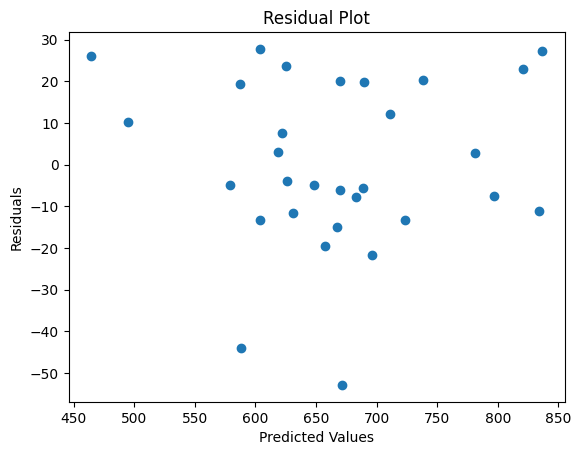

In [57]:
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


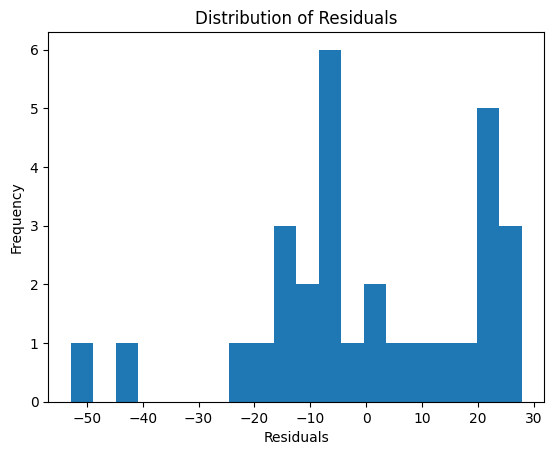

In [58]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


In [59]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regr, x, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [0.95319287 0.93515554 0.8145178  0.9327915  0.94346013]


The linear regression model indicates that, based on the provided data, there is a strong and statistically significant relationship between the dependent variable (Y) and the independent variables (X1 and X2). The model suggests that, on average, a one-unit increase in X1 is associated with a 0.1871 unit increase in Y, while a one-unit increase in X2 is associated with a 6.6027 unit increase in Y. The overall model is well-fitted, explaining approximately 95.1% of the variability in the dependent variable. Additionally, both X1 and X2 have p-values close to zero, confirming their statistical significance in predicting Y.